11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.3830 - val_loss: 0.1891
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1799 - val_loss: 0.1539
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.1493 - val_loss: 0.1335
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.1315 - val_loss: 0.1210
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1201 - val_loss: 0.1124
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1124 - val_loss: 0.1065
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1065 - val_loss: 0.1021
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1025 - val_loss: 0.0990
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0997 - val_loss: 0.0968
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.0977 - val_loss: 0.0954
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


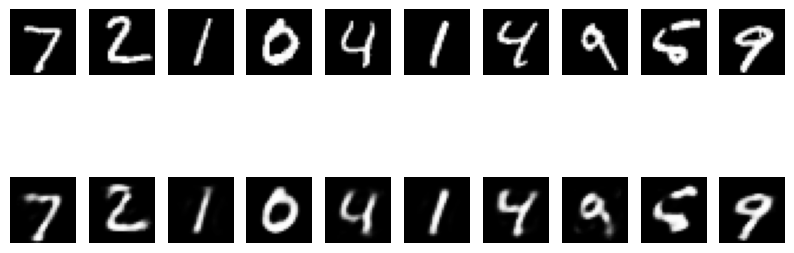

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 784))  # Flatten
x_test = x_test.reshape((x_test.shape[0], 784))

# Define latent space size
latent_dim = 32

# Encoder
def build_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder Model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Build and train the autoencoder
autoencoder = build_autoencoder(latent_dim)
autoencoder.fit(x_train, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Test reconstruction
n = 10  # Number of images to display
sample_imgs = x_test[:n]
reconstructed_imgs = autoencoder.predict(sample_imgs)

# Plot original vs reconstructed images
plt.figure(figsize=(10, 4))
for i in range(n):
    # Original
    plt.subplot(2, n, i + 1)
    plt.imshow(sample_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.3616 - val_loss: 0.2172
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.2069 - val_loss: 0.1818
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - loss: 0.1773 - val_loss: 0.1623
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1604 - val_loss: 0.1504
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1495 - val_loss: 0.1429
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1425 - val_loss: 0.1372
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.1367 - val_loss: 0.1331
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1333 - val_loss: 0.1308
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.1310 - val_loss: 0.1287
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.1290 - val_loss: 0.1274
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


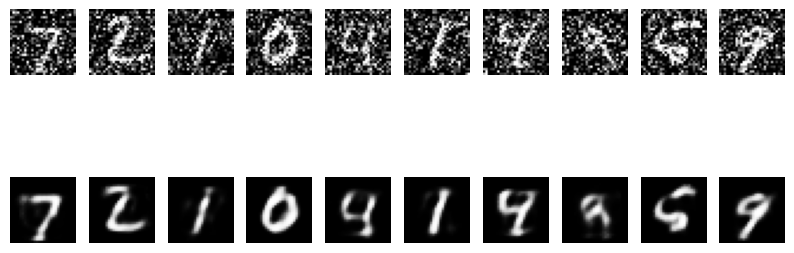

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], 784))  # Flatten
x_test = x_test.reshape((x_test.shape[0], 784))

# Add Gaussian noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Define latent space size
latent_dim = 32

# Encoder
def build_denoising_autoencoder(latent_dim):
    input_img = Input(shape=(784,))
    encoded = Dense(latent_dim, activation='relu')(input_img)

    # Decoder
    decoded = Dense(784, activation='sigmoid')(encoded)

    # Autoencoder Model
    autoencoder = Model(input_img, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return autoencoder

# Build and train the denoising autoencoder
autoencoder = build_denoising_autoencoder(latent_dim)
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=256, shuffle=True, validation_data=(x_test_noisy, x_test))

# Test reconstruction
n = 10  # Number of images to display
sample_imgs_noisy = x_test_noisy[:n]
reconstructed_imgs = autoencoder.predict(sample_imgs_noisy)

# Plot noisy vs reconstructed images
plt.figure(figsize=(10, 4))
for i in range(n):
    # Noisy image
    plt.subplot(2, n, i + 1)
    plt.imshow(sample_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.axis('off')

    # Reconstructed image
    plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
plt.show()


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input
from tensorflow.keras.models import Model
import numpy as np
import random
import sys
import os

# Load text dataset (The Little Prince)
path = tf.keras.utils.get_file('little_prince.txt', 'https://www.gutenberg.org/cache/epub/47913/pg47913.txt')
with open(path, 'r', encoding='utf-8') as f:
    text = f.read().lower()

# Create character mapping
chars = sorted(set(text))
char_to_idx = {c: i for i, c in enumerate(chars)}
idx_to_char = {i: c for i, c in enumerate(chars)}

# Prepare training data
seq_length = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - seq_length, step):
    sentences.append(text[i: i + seq_length])
    next_chars.append(text[i + seq_length])

x = np.zeros((len(sentences), seq_length, len(chars)), dtype=np.bool_)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool_)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_to_idx[char]] = 1
    y[i, char_to_idx[next_chars[i]]] = 1

# Define RNN model with additional LSTM layers
input_layer = Input(shape=(seq_length, len(chars)))
x_rnn = LSTM(256, return_sequences=True)(input_layer)
x_rnn = LSTM(256, return_sequences=True)(x_rnn)
x_rnn = LSTM(128)(x_rnn)
out_layer = Dense(len(chars), activation='softmax')(x_rnn)

model = Model(input_layer, out_layer)
model.compile(loss='categorical_crossentropy', optimizer='adam')

# Train the model
model.fit(x, y, batch_size=128, epochs=20)

# Function to generate text
def generate_text(seed_text, length, temperature=1.0):
    generated = seed_text
    for _ in range(length):
        sampled = np.zeros((1, seq_length, len(chars)))
        for t, char in enumerate(seed_text):
            # Check if t is within the bounds of seq_length
            if t < seq_length:
                sampled[0, t, char_to_idx[char]] = 1.

        preds = model.predict(sampled, verbose=0)[0]
        preds = np.log(preds) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        next_idx = np.random.choice(len(chars), p=preds)
        next_char = idx_to_char[next_idx]

        generated += next_char
        seed_text = seed_text[1:] + next_char

    return generated

# Example of generated text
seed = "it is only with the heart that one can see"
print(generate_text(seed, length=200, temperature=0.8))


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 293s 767ms/step - loss: 3.0692
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 320s 761ms/step - loss: 2.6501
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 286s 763ms/step - loss: 2.2349
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 762ms/step - loss: 2.0917
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 323s 764ms/step - loss: 1.9793
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 323s 766ms/step - loss: 1.8829
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 320s 762ms/step - loss: 1.7774
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 320s 758ms/step - loss: 1.7076
Epoch 9/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 283s 755ms/step - loss: 1.6345
Epoch 10/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 288s 768ms/step - loss: 1.5587
Epoch 11/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 767ms/step - loss: 1.4886
Epoch 12/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 322s 768ms/step - loss: 1.4277
Epoch 13/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 288s 769ms/step - loss: 1.3894
Epoch 14/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 319s 760ms/step - loss: 1.3162
E

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.5259 - loss: 0.6914 - val_accuracy: 0.5400 - val_loss: 0.6899
Epoch 2/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 317s 2s/step - accuracy: 0.5538 - loss: 0.6823 - val_accuracy: 0.5678 - val_loss: 0.6761
Epoch 3/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 321s 2s/step - accuracy: 0.5906 - loss: 0.6597 - val_accuracy: 0.5611 - val_loss: 0.7047
Epoch 4/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.6516 - loss: 0.6258 - val_accuracy: 0.6324 - val_loss: 0.6521
Epoch 5/5
196/196 ━━━━━━━━━━━━━━━━━━━━ 323s 2s/step - accuracy: 0.7088 - loss: 0.5639 - val_accuracy: 0.7923 - val_loss: 0.4903
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step
              precision    recall  f1-score   support

           0       0.81      0.77      0.79     12500
           1       0.78      0.82      0.80     12500

    accuracy                           0.79     25000
   macro avg       0.79      0.79      0.79     25000
weighted avg       0.79      0.79      0.79  

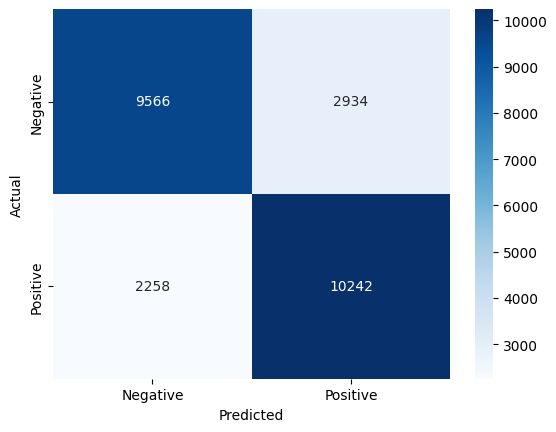

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Embedding, Input, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load IMDB dataset
num_words = 10000  # Vocabulary size
max_length = 200  # Maximum review length
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=num_words)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post', truncating='post')

# Build LSTM sentiment classifier
embedding_dim = 128
input_layer = Input(shape=(max_length,))
x_embed = Embedding(num_words, embedding_dim, input_length=max_length)(input_layer)
x_embed = SpatialDropout1D(0.2)(x_embed)
x_lstm = LSTM(128, dropout=0.2, recurrent_dropout=0.2)(x_embed)
out_layer = Dense(1, activation='sigmoid')(x_lstm)

model = Model(input_layer, out_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=5, batch_size=128, validation_data=(x_test, y_test))

# Evaluate model
y_pred = (model.predict(x_test) > 0.5).astype('int32')
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
